In [202]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import scipy.signal as sp
import scipy

Load Img > Sometimes Blur > HSV > Mask > Threshold > Grayscale > Edges > Circles/Lines > Shape > Centroid. ITS SO SIMPLE.

Am I thinking about this pipeline correctly
Img > Denoise > Mask(HSV/BGR?) > TemplateMatch > Cluster



# Load Image

(200, 500, 3)


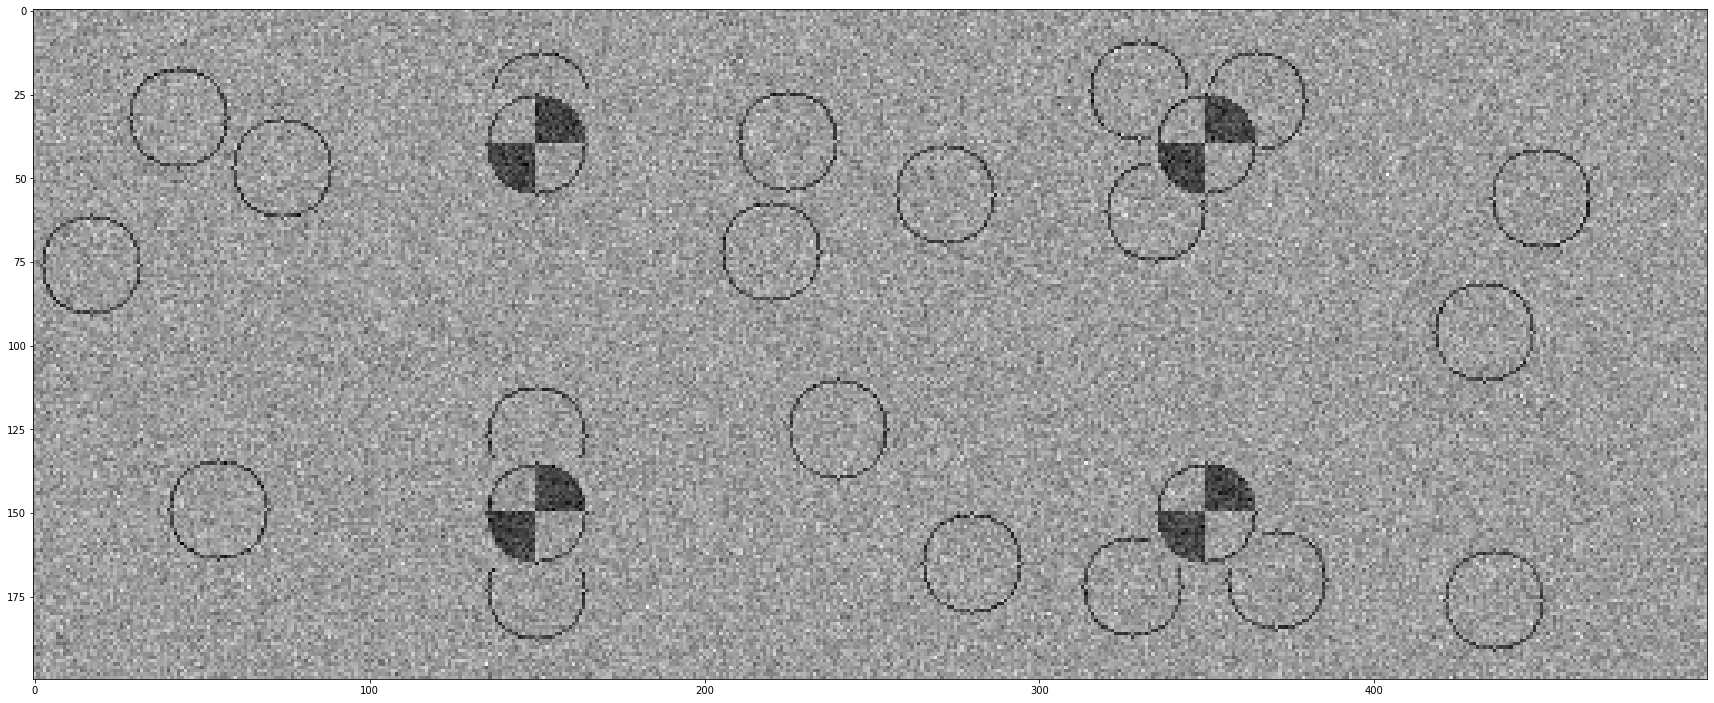

In [203]:
# img = cv2.imread('sim_clear_scene.jpg')
# img = cv2.imread('sim_noisy_scene_1.jpg')
img = cv2.imread('sim_noisy_scene_2.jpg')
# img = cv2.imread('ps3-2-a_base.jpg')
# img = cv2.imread('ps3-2-b_base.jpg')
# img = cv2.imread('ps3-2-c_base.jpg')
print(img.shape)
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# template = cv2.imread('template.jpg', 0)
# print(template.shape)

# plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
# plt.show()

## Remove noise

<Figure size 2160x3600 with 0 Axes>

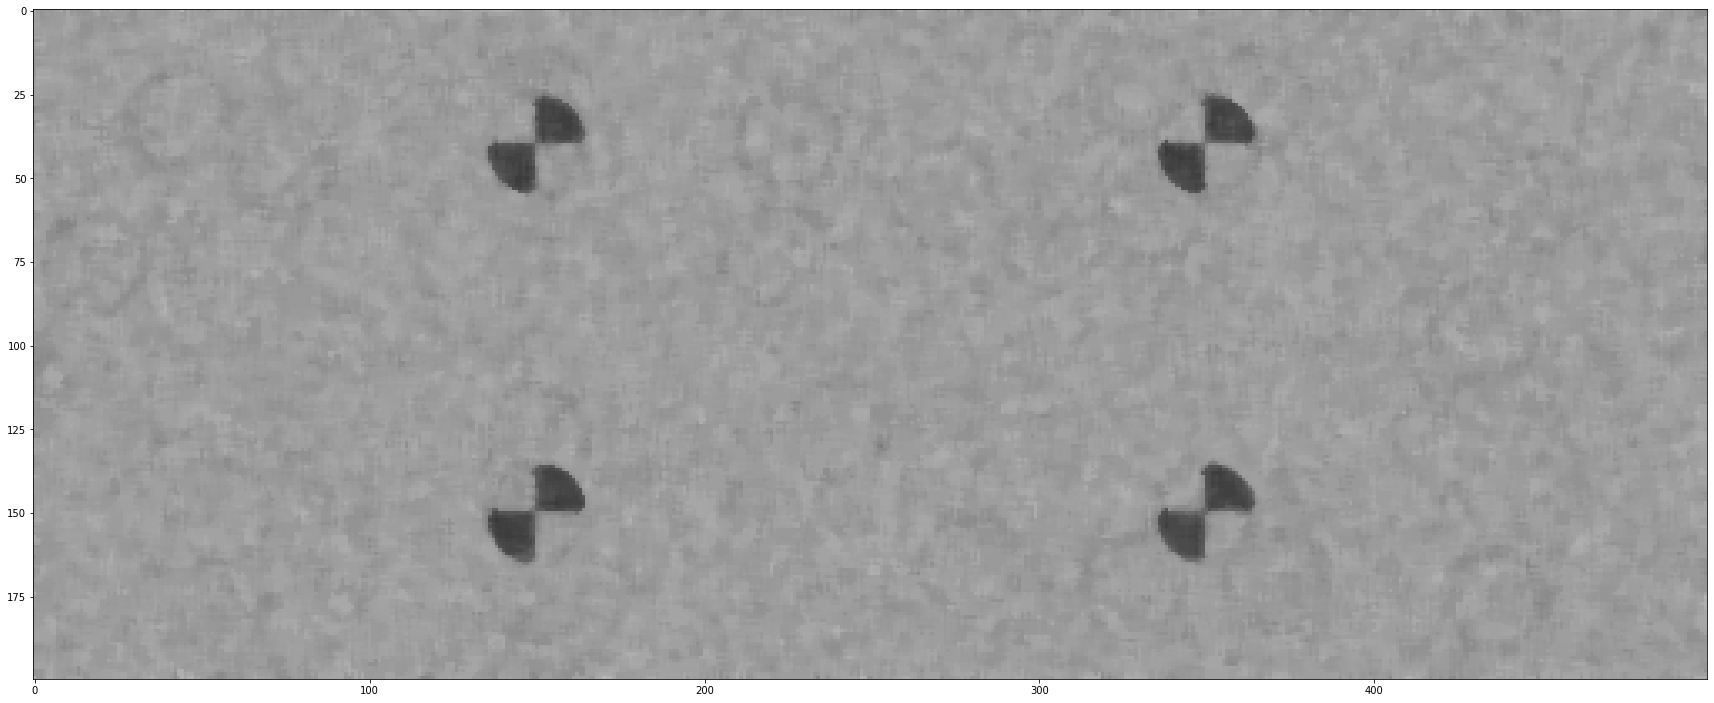

In [222]:
temp_img = np.copy(img)

# GaussianGlur
# blur_sigma = 1
# denoised_img_gauss = cv2.GaussianBlur(temp_img, (5, 5), blur_sigma)
# plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(denoised_img_gauss, cv2.COLOR_BGR2RGB))
# plt.show()


# >>>>>>>>> USING BILATERALFILTER <<<<<<<<<<
# medianBlur
denoised_img_median = cv2.medianBlur(temp_img, 5)
plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(denoised_img_median, cv2.COLOR_BGR2RGB))
# plt.show()

# bilateralFilter
# d, sigma_color, sigma_space = (30, 70, 70)
# denoised_img_bifi = cv2.bilateralFilter(temp_img, d, sigma_color, sigma_space)
# plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(denoised_img_bifi, cv2.COLOR_BGR2RGB))
# plt.show()

denoised_image = denoised_img_median
plt.figure(figsize = (30, 50))
plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.show()

## Mask

In [205]:
def color_filter_bgr(img_in, bgr, tolerance):
    """
    Inspired from https://www.learnopencv.com/color-spaces-in-opencv-cpp-python/
    """
    min_bgr = np.array([bgr[0] - tolerance, bgr[1] - tolerance, bgr[2] - tolerance])
    max_bgr = np.array([bgr[0] + tolerance, bgr[1] + tolerance, bgr[2] + tolerance])

    mask_bgr = cv2.inRange(img_in, min_bgr, max_bgr)
    return mask_bgr
#     plt.imshow(mask_bgr, 'gray')
#     plt.show()
    
#     img_binary = cv2.bitwise_and(img_in, img_in, mask=mask_bgr)
#     plt.imshow(img_binary)
#     plt.show()

#     return img_binary

In [206]:
# bgr = [0, 0, 0]
# tolerance = 120
# img_binary = color_filter_bgr(denoised_image, bgr, tolerance)
# img_binary = cv2.bitwise_not(img_binary)

# plt.figure(figsize = (30, 50))
# plt.imshow(cv2.cvtColor(img_binary, cv2.COLOR_BGR2RGB))
# plt.show()

## Gray Scaling or Averaging

In [ ]:
denoised_img_median

## Harris Detector

In [216]:
# template_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# template_img = np.average(denoised_img_median, axis=2)
harris_image = np.float32(denoised_img_median)

dst = cv2.cornerHarris(harris_image, 5, 7, 0.24)
print(dst.shape)

threshold = 0.95
results = np.where(dst > threshold)
print("results: ", results)

markers = []
for marker in zip(*results[::-1]):
    x = marker[0]
    y = marker[1]
    markers.append((x, y))
print("length: ", len(markers))

error: OpenCV(4.1.2) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/corner.cpp:254: error: (-215:Assertion failed) src.type() == CV_8UC1 || src.type() == CV_32FC1 in function 'cornerEigenValsVecs'


## Draw

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


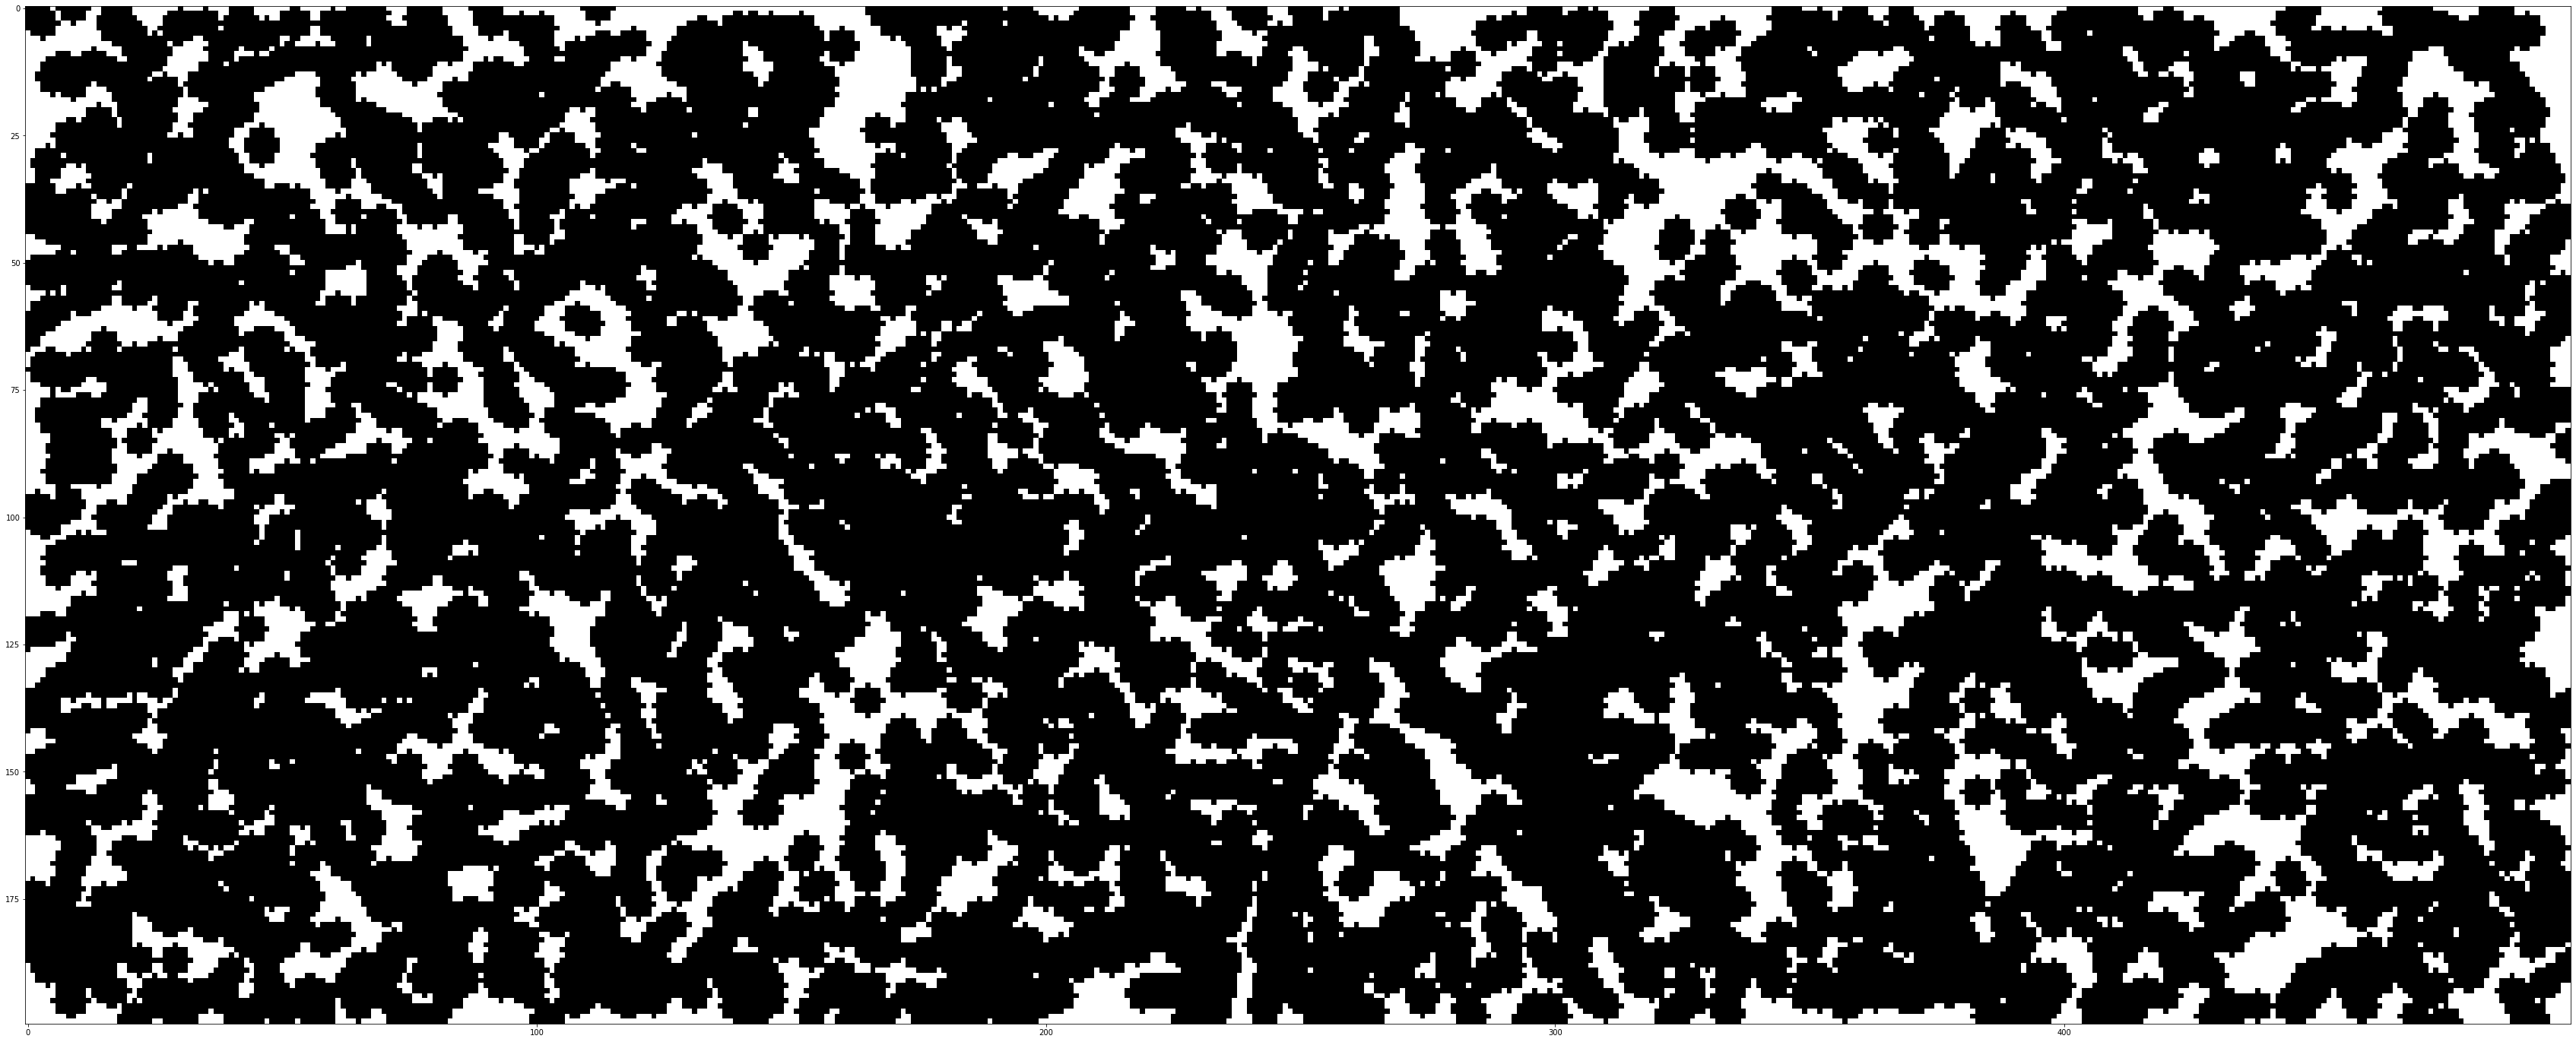

[(9, 0), (90, 0), (112, 0), (168, 0), (172, 0), (181, 0), (188, 0), (239, 0), (251, 0), (266, 0), (411, 0), (447, 0), (485, 0), (67, 1), (68, 1), (168, 1), (178, 1), (181, 1), (187, 1), (188, 1), (189, 1), (195, 1), (240, 1), (251, 1), (266, 1), (405, 1), (406, 1), (411, 1), (447, 1), (465, 1), (485, 1), (2, 2), (17, 2), (18, 2), (42, 2), (65, 2), (77, 2), (78, 2), (79, 2), (91, 2), (173, 2), (174, 2), (187, 2), (195, 2), (209, 2), (210, 2), (214, 2), (224, 2), (241, 2), (266, 2), (297, 2), (298, 2), (299, 2), (321, 2), (345, 2), (359, 2), (368, 2), (404, 2), (410, 2), (468, 2), (485, 2), (3, 3), (17, 3), (30, 3), (35, 3), (52, 3), (53, 3), (60, 3), (68, 3), (78, 3), (91, 3), (170, 3), (172, 3), (175, 3), (188, 3), (208, 3), (225, 3), (226, 3), (227, 3), (230, 3), (258, 3), (260, 3), (261, 3), (262, 3), (265, 3), (266, 3), (299, 3), (305, 3), (306, 3), (308, 3), (319, 3), (346, 3), (347, 3), (348, 3), (352, 3), (358, 3), (359, 3), (401, 3), (410, 3), (420, 3), (421, 3), (444, 3), (445,

In [210]:
marked_img = np.copy(harris_image)
# for pt in zip(*loc[::-1]):
for pt in markers:
    cv2.circle(marked_img, pt, 3, (0, 255, 0), -1)
    
plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.show()
print(markers)

## Cluster

In [211]:
markers_float32 = np.array(markers, dtype='float32')
print(markers_float32)


# criteria = (cv2.TERM_CRITERIA_EPS, 100, 0.001)

# ret, label, markers_ = cv2.kmeans(markers_float32, 4, None, criteria, 100, flags=cv2.KMEANS_RANDOM_CENTERS)

# Define criteria = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Set flags (Just to avoid line break in the code)
flags = cv2.KMEANS_RANDOM_CENTERS

# Apply KMeans
compactness,labels,centers = cv2.kmeans(markers_float32, 4, None, criteria,10,flags)

print(centers)

markers_clustered = [tuple(x) for x in centers.astype(np.uint16).tolist()]

print(markers_clustered)

[[  9.   0.]
 [ 90.   0.]
 [112.   0.]
 ...
 [431. 199.]
 [475. 199.]
 [492. 199.]]
[[327.0358  115.41803]
 [ 70.17679 104.27428]
 [204.52682  99.03195]
 [440.03375  93.31204]]
[(327, 115), (70, 104), (204, 99), (440, 93)]


In [212]:
markers_float32.shape

(9778, 2)

# Draw clustered points

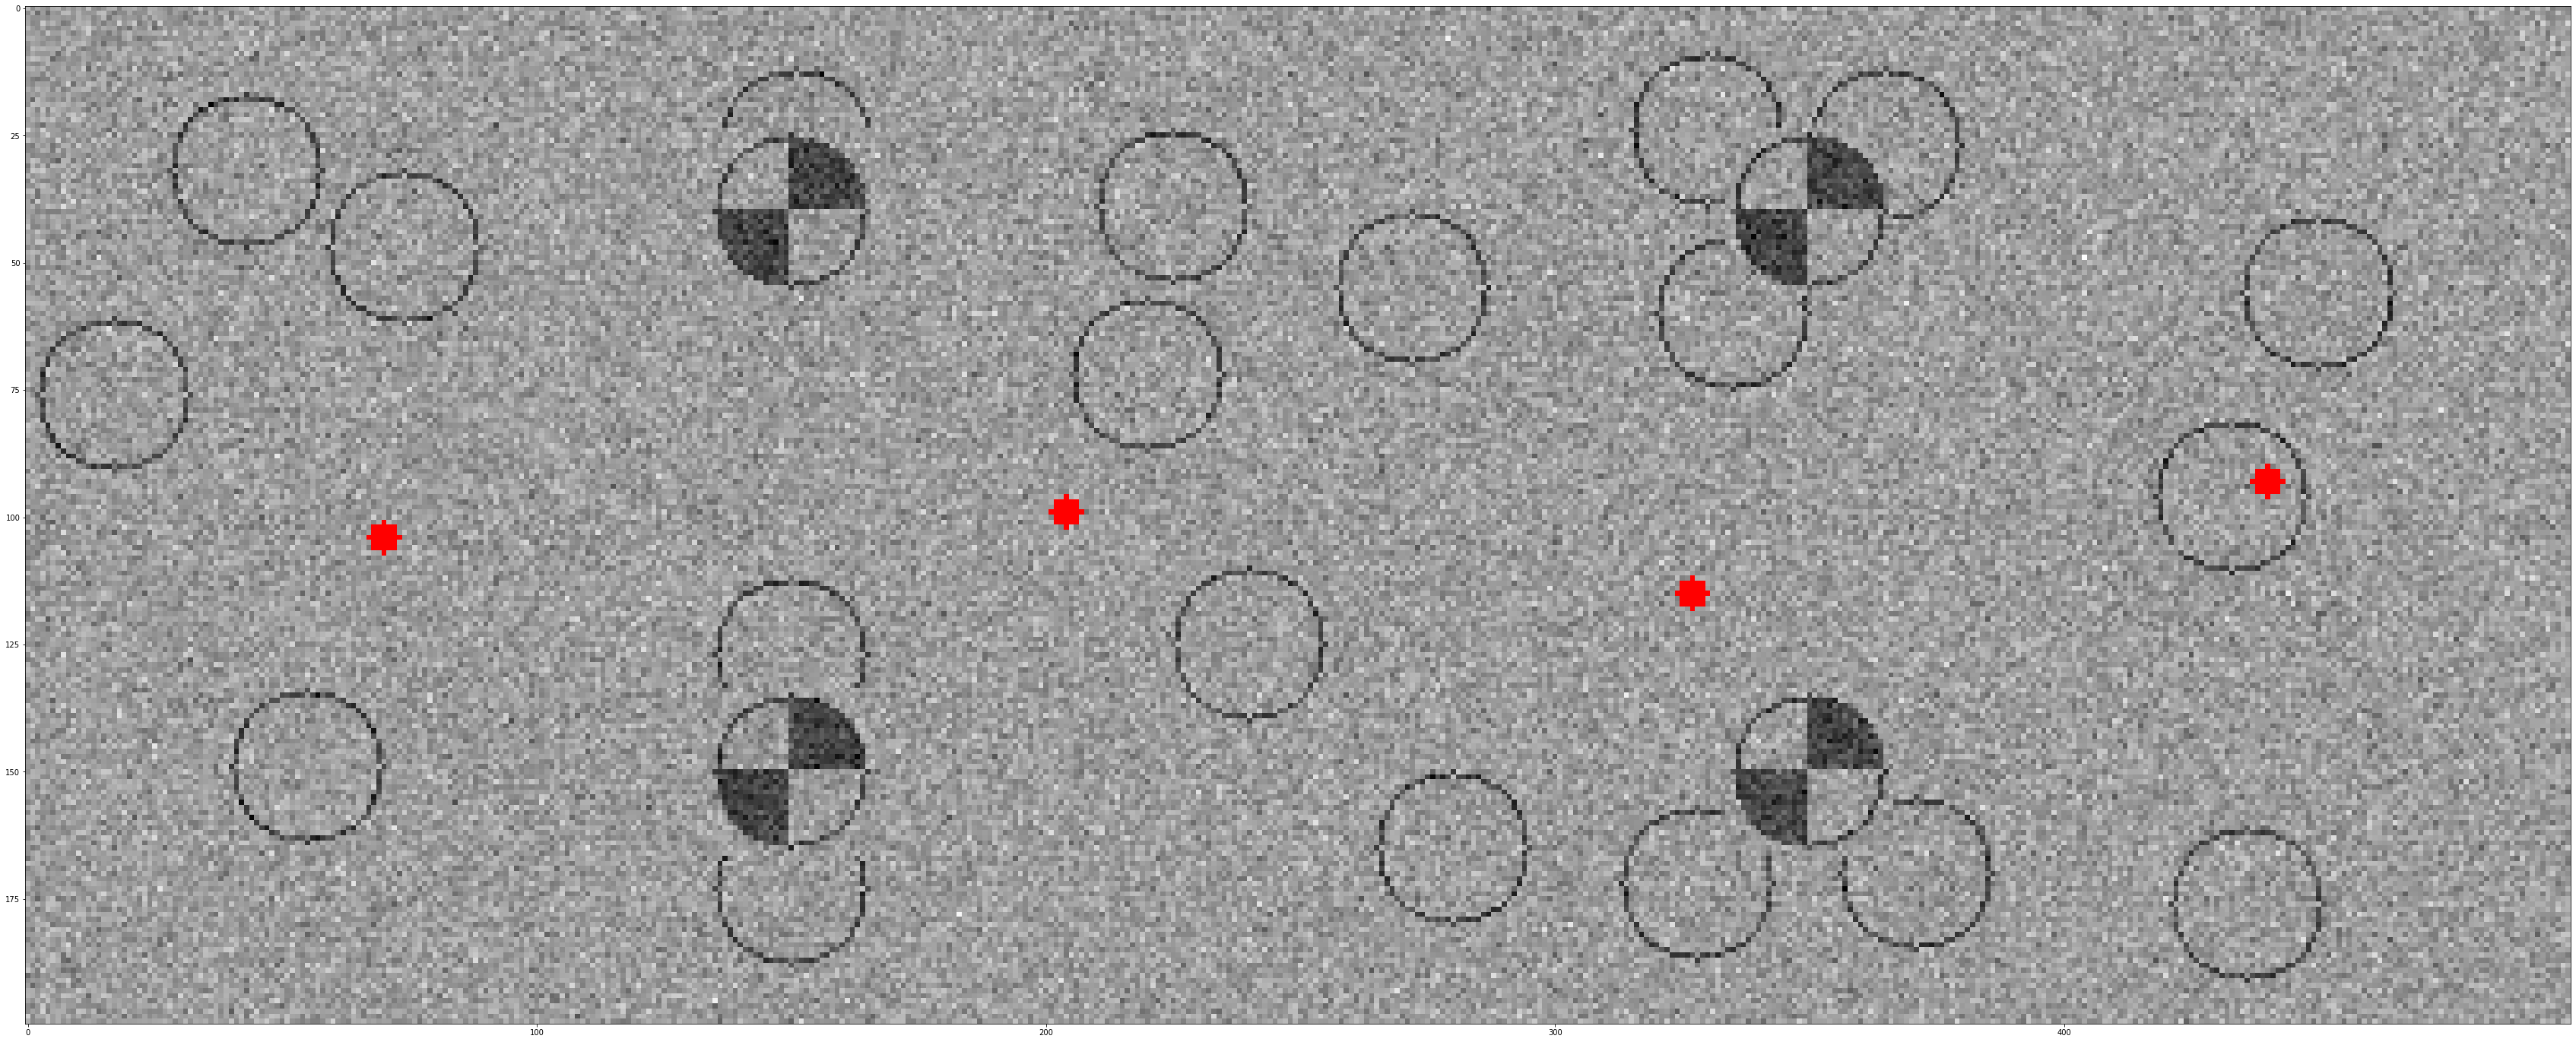

[(327, 115), (70, 104), (204, 99), (440, 93)]


In [213]:
marked_img = np.copy(img)
# for pt in zip(*loc[::-1]):
for pt in markers_clustered:
    cv2.circle(marked_img, pt, 3, (0, 0, 255), -1)
    
plt.figure(figsize = (60, 100))
plt.imshow(cv2.cvtColor(marked_img, cv2.COLOR_BGR2RGB))
plt.show()
print(markers_clustered)